In [1]:
import numpy as np

In [2]:
import sys
sys.path.insert(0, "/home/monica/Documents/2_ano/sistemas/si/") 
from src.si.data.dataset import Dataset
from src.si.linear_model.ridge_regression import RidgeRegression
from src.si.linear_model.logistic_regression import LogisticRegression
from src.si.model_selection.split import train_test_split
import matplotlib.pyplot as plt

from sklearn import preprocessing


In [3]:
from src.si.io_folder.module_csv import read_csv

# Avaliação Aula 5 (24/10/2022)

## Exercício 5: Completa as implementações dos modelos RidgeRegression e LogisticRegression

##### 5.1) Adiciona aos modelos anteriores o atributo (parâmetro estimado) cost_history.

- O cost_history deve ser um dicionário.
- Durante as iterações do Gradient Descent, computa a função de custo (self.cost(dataset)) e armazena o resultado no dicionário cost_history.
- A chave deve ser o número da iteração e o valor deve ser o custo nessa iteração.

##### 5.2) Realiza um gráfico (line plot) que permita visualizar o comportamento do custo em função do número de iterações.

- O eixo Y deve conter o valor de custo enquanto o eixo X deve conter as iterações. Podes usar o dicionário cost_history.
- Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression.
- Usa o dataset breast-bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression.

In [4]:
cpu = read_csv('/home/monica/Documents/2_ano/sistemas/si/datasets/cpu.csv', sep=',',features=True, label=True)

cpu.X = preprocessing.StandardScaler().fit_transform(cpu.X)

cpu_train, cpu_test = train_test_split(cpu)

# fit the model
model_cpu = RidgeRegression()
model_cpu.fit(cpu_train)

# get coefs
print(f"Parameters: {model_cpu.theta}")

# predict
y_pred_ = model_cpu.predict(cpu_test)
print(f"Predictions: {y_pred_}")

# compute the score
score = model_cpu.score(cpu_test)
print(f"Score: {score}")

# compute the cost
cost = model_cpu.cost(cpu_test)
print(f"Cost: {cost}")


Parameters: [ 1.86813894 40.07633808 53.7796827  29.63395584 14.3889974  28.54376163]
Predictions: [ 1.29152145e+02 -7.52233611e+00 -1.53706124e-01  6.22349785e+02
  7.47766043e+00  2.76148812e+02  3.00012035e+01 -2.13317593e+01
  8.13321601e+02  2.71299569e+02  9.82558537e+01  1.16199110e+02
  3.38056577e+01  3.24264628e+01  7.97537809e+01  1.87891296e+01
  1.26725431e+02  4.54445507e+00  1.76520807e+02  9.78019719e+01
  6.45503166e+01  3.81043206e+01  1.39495932e+02 -1.76237890e+00
 -2.35326481e+01  2.55720246e+01 -1.90835392e+01  8.18876747e+00
  2.41960749e+00  6.91166491e+01  2.75721962e+02  2.87412072e+01
  9.90545717e+00 -1.42702577e+01 -1.95431996e+01  3.20112349e+01
  2.47045892e+01  3.75847703e+02  1.75191466e+02 -6.35726136e+00
  4.30339924e+02]
Score: 3739.744088579587
Cost: 3817.8150398188864


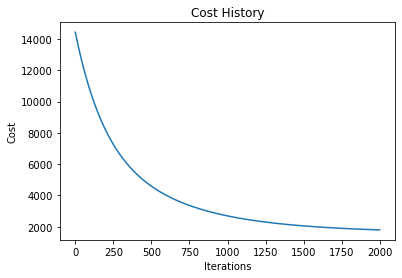

In [5]:
model_cpu.cost_plot()

In [6]:
breast_bin = read_csv('/home/monica/Documents/2_ano/sistemas/si/datasets/breast-bin.csv', sep=',',features=True, label=True)

breast_bin.X = preprocessing.StandardScaler().fit_transform(breast_bin.X)

breast_bin_train, breast_bin_test = train_test_split(breast_bin)

# fit the model    
model_b = LogisticRegression()
model_b.fit(breast_bin_train)

# get coefs
print(f"Parameters: {model_b.theta}")

# predict
y_pred_ = model_b.predict(breast_bin_test)
print(f"Predictions: {y_pred_}")

# compute the score
score = model_b.score(breast_bin_test)
print(f"Score: {score}")

# compute the cost
cost = model_b.cost(breast_bin_test)
print(f"Cost: {cost}")

Parameters: [0.30626566 0.32055971 0.32619591 0.27247957 0.25177695 0.35423688
 0.29394662 0.26761051 0.15859897]
Predictions: [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
Score: 0.9856115107913669
Cost: 0.18558896313760445


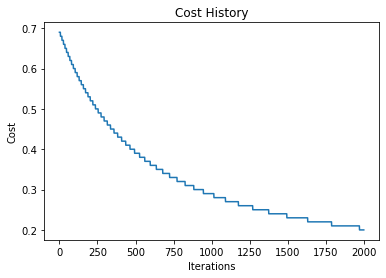

In [7]:
model_b.cost_plot()

##### 5.3) Altera agora o algoritmo de Gradient Descent. Este algoritmo deve parar quando o valor da função de custo (J/self.cost) não se altera.

- Quando a diferença entre o custo da iteração anterior e o custo da iteração atual for inferior a um determinado valor deves parar o Gradient Descent.
- No caso do RidgeRegression, o critério de paragem deve ser uma diferença inferior a 1.
- No caso do LogisticRegression, o critério de paragem deve ser uma diferença inferior a 0.0001.
- Deves usar o dicionário cost_history para obteres o custo da iteração anterior e calcular a diferença da seguinte forma: cost_history(i-1) – cost_history(i).
- Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression
- Usa o dataset breast-bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression

In [8]:
# Alterado no modo adaptive fit (está em comentário no regular). 

## Duvida: é suposto alterar o original (que agora é regular)?

##### 5.4) (OPCIONAL) Adiciona uma segunda versão do algoritmo Gradient Descent. Este algoritmo deve diminuir o valor de alfa quando a função de custo (J/self.cost) não se altera.

- Quando a diferença entre o custo da iteração anterior e o custo da iteração atual for inferior a um determinado valor deves diminuir o alfa
- No caso do RidgeRegression, o critério para alterar o alfa deve ser uma diferença inferior a 1.
- No caso do LogisticRegression, o critério para alterar o alfa deve ser uma diferença inferior a 0.0001.
- Deves diminuir o valor do alfa usando a seguinte sugestão: self.alfa = self.alfa/2
- Deves usar o dicionário cost_history para obteres o custo da iteração anterior e calcular a diferença da seguinte forma: cost_history(i-1) – cost_history(i).
- Usa o dataset cpu.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo RidgeRegression com o novo Gradient Descent
- Usa o dataset breast-bin.csv, o package matplotlib e um jupyter notebook para visualizares o comportamento da função de custo (J) no modelo LogisticRegression com o novo Gradient Descent

In [8]:
cpu_train, cpu_test = train_test_split(cpu)

# fit the model
model_cpu = RidgeRegression(use_adaptive_alpha=True)
model_cpu.fit(cpu_train)

# get coefs
print(f"Parameters: {model_cpu.theta}")

# predict
y_pred_ = model_cpu.predict(cpu_test)
print(f"Predictions: {y_pred_}")

# compute the score
score = model_cpu.score(cpu_test)
print(f"Score: {score}")

# compute the cost
cost = model_cpu.cost(cpu_test)
print(f"Cost: {cost}")


Parameters: [-2.54495225 37.27791134 48.11977945 30.20431318 16.55483675 26.546173  ]
Predictions: [128.28986118 -15.60912936  -9.96713729 574.66767509 -12.20452137
 253.79593998  21.2654295  -28.10446087 763.84844566 256.4333539
  87.19561042 103.44210261  23.88344802  24.82629363  65.01301729
   9.7063237  120.35854904  -1.2561187  161.86731189  85.16076497
  51.19760401  28.0559306  127.69577628 -21.53673311 -41.55891759
  16.56467726 -27.75610347   2.41128403  -3.57355575  59.19496844
 255.4632684   21.1401694    2.71981019 -19.06175758 -33.0623059
  24.19106968  10.71618926 350.46118095 151.71181682 -12.15053325
 420.6503474 ]
Score: 4629.244386015988
Cost: 4697.569935838412


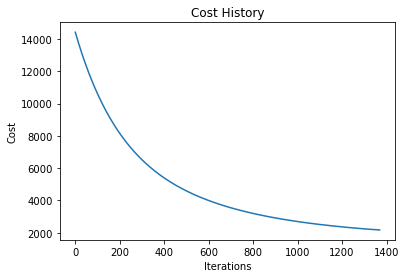

In [9]:
model_cpu.cost_plot()

In [10]:
breast_bin_train, breast_bin_test = train_test_split(breast_bin)

# fit the model    
model_b = LogisticRegression(use_adaptive_alpha=True)
model_b.fit(breast_bin_train)

# get coefs
print(f"Parameters: {model_b.theta}")

# predict
y_pred_ = model_b.predict(breast_bin_test)
print(f"Predictions: {y_pred_}")

# compute the score
score = model_b.score(breast_bin_test)
print(f"Score: {score}")

# compute the cost
cost = model_b.cost(breast_bin_test)
print(f"Cost: {cost}")

Parameters: [0.00103824 0.00116097 0.00115981 0.00099354 0.00096986 0.00115512
 0.00105531 0.00099401 0.00058398]
Predictions: [1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
Score: 0.9856115107913669
Cost: 0.6898192359156359


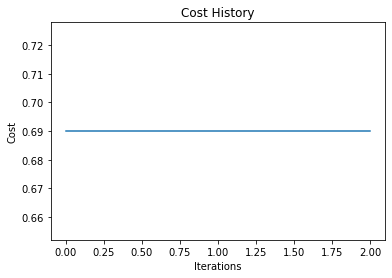

In [11]:
model_b.cost_plot()